# GHCN - Climatologic Daily Time Series Exploration (Precipitation, temperature min/min, ...)
GHCN data: Global Historical Climatology Network https://www.ncdc.noaa.gov/ghcnd-data-access

Python Script:  July 2020, L. Duffar https://github.com/loicduffar

This notebook reads the 3 inventory files (not the measurements themselves), and display the informations in a single browser (station, country, period by parameter), allowing to apply filter (e.g. select country and/or stations). In addition a graph is plotted representing the number of stations for each year, and a map is displayed to show the station locations. Outputs can be saved in an excel file.

The 3 inventory files (see below) should be downloaded from ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/, and stored to your local drive.

- 1) Run the 1st cell below to read the informations and display the browser. 
     Browse the stations or apply filter to select a contry, and select the desired stations
- 2) Run the 2nd cell to plot a graph representing Number of stations in operation, by parameter (only the ones filtered/selected)
- 3) Run the 3rd cell to display a map with the location of the stations (only the ones filtered/selected)
  If needed, run the cell 3bis to display the map in a separated big window
- 4) If needed, save the selected list and the graph in an excel file

## 1) Files reading (stations, inventory, country), informations merging and interactive Browsing in a single table

(Library qgrid v 1.3.1, compatible with pandas v 1)

Inventory files to be downloaded and stored on your local drive:
- ghcnd-stations.txt: Station ID, name, lon, lat, altitude, GSN network (plus an integer whose meaning is unknown)
- ghcnd-inventory.txt: Period of measurement for each parameter
- ghcnd-countries.txt: Extended country name, according the 2 first letters of the Station Id

Tutorial:
- a) Customize the files path (e.g. path= r"C:\Users\...")
- b) Run the cell below to display the browser (period of measurement is indicated for each parameter by the year of beginning and ending)
- c) Apply filter(s) by column (e.g. CTRY to select one country and ID to select station(s)) 

In [50]:
"""
Created on Jul 2020
@author: Loïc Duffar
"""
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import qgrid
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None, "display.max_columns", None)

#********** Customization **************************
path= r"C:\Users\DUFFAR\Documents\A\Download\Hydro-Climato\NCEI (ex NCDC)\GHCN\Daily V3".replace('\\', '/')
path_online = r"https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access"

#********** Files reading **************************
# --------------- STATIONS
file_in= os.path.join(path,"ghcnd-stations.txt")
header = ['ID', 'LAT', 'LON', 'ALT', 'STATE', 'NAME', 'GSN', 'Unknown']
df = pd.read_fwf(file_in, colspecs='infer', infer_nrows=26000, names = header, index_col='ID')

# --------------- INVENTORY (PARAMETER & PERIOD)
file_in= os.path.join(path,"ghcnd-inventory.txt")
header = ['ID', 'LAT', 'LON', 'PARAM', 'BEG', 'END']
df2 = pd.read_fwf(file_in, colspecs='infer', infer_nrows=100, names = header, index_col='ID')
cols = ['PARAM', 'BEG', 'END' ]
lparam = ['PRCP', 'TMIN', 'TMAX', 'EVAP', 'SNOW', 'SNWD']# can be completed if needed (additionnal parameters are numerous)
for param in lparam:
    for col in cols[1:]:
        df[param+'_'+col] = df2.loc[df2['PARAM']==param, col]

# --------------- COUNTRY
file_in= os.path.join(path,"ghcnd-countries.txt")
header = ['CTRY_ID', 'CTRY']
df2 = pd.read_fwf(file_in, colspecs='infer', infer_nrows=100, names = header, index_col='CTRY_ID')
list = []
for id in df.index:
    list.append( df2.loc[ id[:2], 'CTRY'] )
df['CTRY'] = list

#********** Display Informations in a browser ******************
widget = qgrid.show_grid(df, show_toolbar=True)
display(widget)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

 ## 2) Graph representing Number of stations in operation, by parameter
 (library matplotlib)

- a) Run the cell below to display the graph representing "Number of stations in operation"
- b) Re run the cell below after each filter application in the browser, to update the graphe

" ----------- Not functional\n# Automatic update of the graph according to the filter(s) applied in the browser above\n# To be used in conjunction with the instruction '%matplotlib notebook' above (disabled at this time)\nwidget.on('filter_changed', handle_filter_changed)    \n\ndef handle_filter_changed(event, widget):\n    stat_numbers = pd.DataFrame(None, index=years, columns=lparam)\n    for param in lparam:\n        for year in years:\n            stat_numbers.loc[year, param] = qg_df.loc[ (qg_df[param+'_BEG']<=year) & (qg_df[param+'_END']>=year),  param+'_BEG'].count()\n    lines.set_data(stat_number)\n    fig = plt.gcf()\n    fig.canvas.draw()\n"

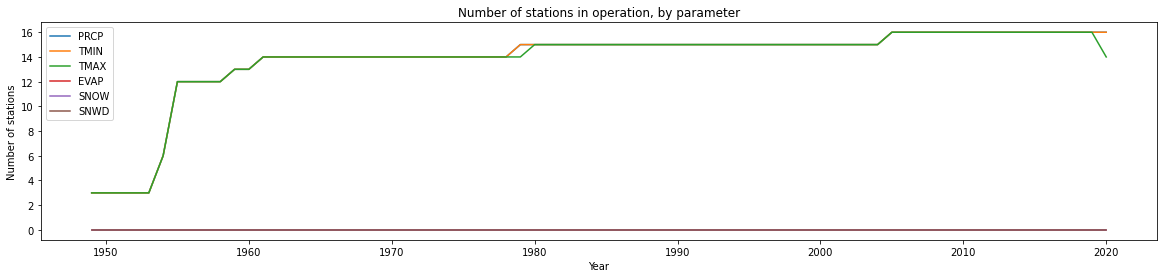

In [48]:
# ******************** Work in progress
qg_df = widget.get_changed_df()
year_min = 9999
year_max = 0
for param in lparam:
    if qg_df[param+'_BEG'].min()<year_min: year_min = qg_df[param+'_BEG'].min()
    if qg_df[param+'_END'].max()>year_max: year_max = qg_df[param+'_END'].max()
years = np.arange(year_min, year_max+1 )

stat_numbers = pd.DataFrame(None, index=years, columns=lparam)
for param in lparam:
    for year in years:
        stat_numbers.loc[year, param] = qg_df.loc[ (qg_df[param+'_BEG']<=year) & (qg_df[param+'_END']>=year),  param+'_BEG'].count()

lines = stat_numbers.plot(figsize=(20, 4))
plt.xlabel('Year')
plt.ylabel('Number of stations')
plt.title('Number of stations in operation, by parameter')
if os.path.exists('../out')==False: os.mkdir('../out')
plt.savefig('../out/GTHCN - Stations number.png', dpi=300)

""" ----------- Not functional
# Automatic update of the graph according to the filter(s) applied in the browser above
# To be used in conjunction with the instruction '%matplotlib notebook' above (disabled at this time)
widget.on('filter_changed', handle_filter_changed)    

def handle_filter_changed(event, widget):
    stat_numbers = pd.DataFrame(None, index=years, columns=lparam)
    for param in lparam:
        for year in years:
            stat_numbers.loc[year, param] = qg_df.loc[ (qg_df[param+'_BEG']<=year) & (qg_df[param+'_END']>=year),  param+'_BEG'].count()
    lines.set_data(stat_number)
    fig = plt.gcf()
    fig.canvas.draw()
"""

## 3) Display the stations map
(Library Plotly - Scattermapbox)
- a) Run the cell below to display a map of the stations (all parameters combined)
- b) Re run the cell below after each filter application in the browser, to update the map 

In [49]:
import plotly.graph_objects as go

qg_df = widget.get_changed_df()

fig = go.Figure(go.Scattermapbox(
                        mode = "markers",
                        lon = qg_df['LON'],
                        lat = qg_df['LAT'],
                        marker = dict(size= 5, color= 'red'),
                        text = qg_df.index+' - '+qg_df['NAME'],
                        hoverinfo  = 'text' 
                                 ))

fig.update_layout(  margin = dict(t=0, b=0, r=0, l=0),
                    mapbox = dict(
                                style= "open-street-map",    # open-street-map, carto-positron, stamen-terrain, stamen-toner
                                center= dict(lon= 80.9, lat= 7.5),
                                zoom= 1) )

## 3 bis) Display the map on a separated html file (optionnal)
(Library Plotly - Mapbox)
- a) Run the cell below to display the map in a separate web explorer window
- b) Re run the cell after a filter application, to update the map

In [27]:
"""
Created on Jul 2020
@author: Loïc Duffar
"""
import plotly.graph_objects as go
import plotly

qg_df = widget.get_changed_df()

# Open mapbox account and pass your access token over here
# Mapbox account sign up and access token is free. 
# Mapbox information: https://www.mapbox.com/help/how-access-tokens-work/#rotating-tokens
mapbox_access_token = 'pk.eyJ1IjoibG9pYy1zYWxzZXJvIiwiYSI6ImNrY2syODZvMjFwd2YydG84ZDR2ZXZ2NncifQ.2JN19jp_EvWCpmSi7QgF5A'

data = [go.Scattermapbox(
    mode = "markers",
    lon = qg_df['LON'],
    lat = qg_df['LAT'],
    marker = dict(size= 5, color= 'red'),
    text = qg_df.index+' - '+qg_df['NAME'],
    textposition='middle right',
    hoverinfo  = 'text'
        )]

layout = go.Layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'style': "light",   # basic, streets, outdoors, light, dark, satellite, satellite-streets
        'center': {'lon': 80.9, 'lat': 8},
        'zoom': 2,
        'accesstoken': mapbox_access_token,
        'bearing': 0,
        'pitch': 0
        }
    )                  

if os.path.exists('../out')==False: os.mkdir('../out')
plotly.offline.plot({"data":data, "layout":layout}, filename = '../out/GHCN.html')

'../out/GHCN.html'

## 4) Save an excel file containing the list and the graph for the selected stations
WARNING: Don't do that without filtering the stations in the browser above, otherwise the number of lines (115 000) will exceed the excel limit !

In [45]:
qg_df = widget.get_changed_df()

if os.path.exists('../out')==False: os.mkdir('../out')
writer = pd.ExcelWriter("../out/GHCN - Output.xlsx")
workbook  = writer.book
qg_df.to_excel(writer, sheet_name='Summary', startrow=18)
if os.path.exists('../out/GTHCN - Stations number.png'):
    worksheet = writer.sheets['Summary']
    worksheet.insert_image('A1', '../out/GTHCN - Stations number.png')
writer.save()